In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from moviepy import ImageSequenceClip

In [2]:
def create_environment(env_name="Taxi-v3", render_mode="rgb_array"):
   """Create and return a Gymnasium environment."""
   return gym.make(env_name, render_mode=render_mode)

In [3]:
def initialize_q_table(env):
   """Initialize and return a Q-table for the given environment."""
   n_states = env.observation_space.n
   n_actions = env.action_space.n
   return np.zeros((n_states, n_actions))

In [4]:
def epsilon_greedy(env, Q_table, state, epsilon=0.1):
   """Epsilon-greedy action selection."""
   if np.random.random() < epsilon:
       return env.action_space.sample()
   else:
       return np.argmax(Q_table[state])

In [5]:
def sarsa_update(Q_table, state, action, reward, next_state, next_action, alpha, gamma):
   """Perform SARSA update on Q-table."""
   Q_table[state, action] += alpha * (
       reward + gamma * Q_table[next_state, next_action] - Q_table[state, action]
   )

In [6]:
def train_sarsa(env, n_episodes=20000, alpha=0.1, gamma=0.99, epsilon=0.1):
   """Train the agent using SARSA algorithm."""
   Q_table = initialize_q_table(env)
   episode_rewards = []
   episode_lengths = []
   for episode in range(n_episodes):
       state, _ = env.reset()
       action = epsilon_greedy(env, Q_table, state, epsilon)
       done = False
       total_reward = 0
       steps = 0
       while not done:
           next_state, reward, terminated, truncated, _ = env.step(action)
           done = terminated or truncated
           next_action = epsilon_greedy(env, Q_table, next_state, epsilon)
           sarsa_update(
               Q_table, state, action, reward, next_state, next_action, alpha, gamma
           )
           state = next_state
           action = next_action
           total_reward += reward
           steps += 1
       episode_rewards.append(total_reward)
       episode_lengths.append(steps)
   return Q_table, episode_rewards, episode_lengths

In [7]:
def plot_learning_curve(episode_rewards, episode_lengths):
   """Plot the learning curve."""
   plt.figure(figsize=(12, 5))
   plt.subplot(1, 2, 1)
   plt.plot(episode_rewards)
   plt.title("Episode Rewards")
   plt.xlabel("Episode")
   plt.ylabel("Total Reward")
   plt.subplot(1, 2, 2)
   plt.plot(episode_lengths)
   plt.title("Episode Lengths")
   plt.xlabel("Episode")
   plt.ylabel("Number of Steps")
   plt.tight_layout()
   plt.show()

In [8]:
def create_gif(frames, filename, fps=5):
   """Creates a GIF animation from a list of frames."""
   clip = ImageSequenceClip(frames, fps=fps)
   clip.write_gif(filename, fps=fps)

In [9]:
def run_episode(env, Q_table, epsilon=0):
   """Run a single episode using the learned Q-table."""
   state, _ = env.reset()
   done = False
   total_reward = 0
   frames = [env.render()]
   while not done:
       action = epsilon_greedy(env, Q_table, state, epsilon)
       next_state, reward, terminated, truncated, _ = env.step(action)
       done = terminated or truncated
       frames.append(env.render())
       total_reward += reward
       state = next_state
   return frames, total_reward

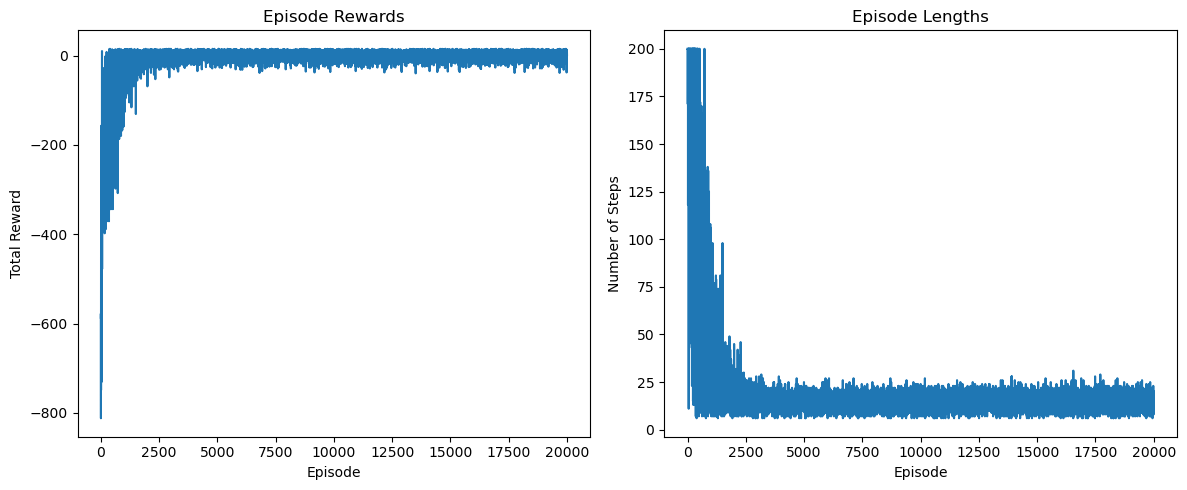

MoviePy - Building file sarsa_final_animation.gif with imageio.


In [10]:
if __name__ == "__main__":
   env = create_environment()

   Q_table, episode_rewards, episode_lengths = train_sarsa(env, n_episodes=20000)
   plot_learning_curve(episode_rewards, episode_lengths)

   frames, total_reward = run_episode(env, Q_table)
   create_gif(frames, "sarsa_final_animation.gif", fps=10)

In [11]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
